## Importing libraries

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

## Importing dataset

In [2]:
dataset = pd.read_csv('coin_Bitcoin.csv', header = 0)

In [3]:
dataset.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


## Deleting useless columns and setting new index

In [4]:
dataset = dataset.drop(['Volume', 'Symbol', 'Name', 'Marketcap', 'SNo'], axis = 1)

## Converting values in column Date into datetime64 dtype and check

In [5]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2991 non-null   datetime64[ns]
 1   High    2991 non-null   float64       
 2   Low     2991 non-null   float64       
 3   Open    2991 non-null   float64       
 4   Close   2991 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 117.0 KB


In [7]:
dataset.dtypes

Date     datetime64[ns]
High            float64
Low             float64
Open            float64
Close           float64
dtype: object

## Setting new key index

In [8]:
dataset = dataset.set_index('Date')

In [9]:
dataset.head()

,High,Low,Open,Close
Date,,,,
2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993
2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000
2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998
2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999
2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000


## Saving as a new file in order to use it efectively

In [10]:
dataset.to_csv('modified_dataset.csv')

## Making some kind of plots

#### Helpful function

In [11]:
def plot_dataset(df, x, y, title="", color="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,10), dpi=dpi)
    plt.plot(x, y, color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

### Plot for Open

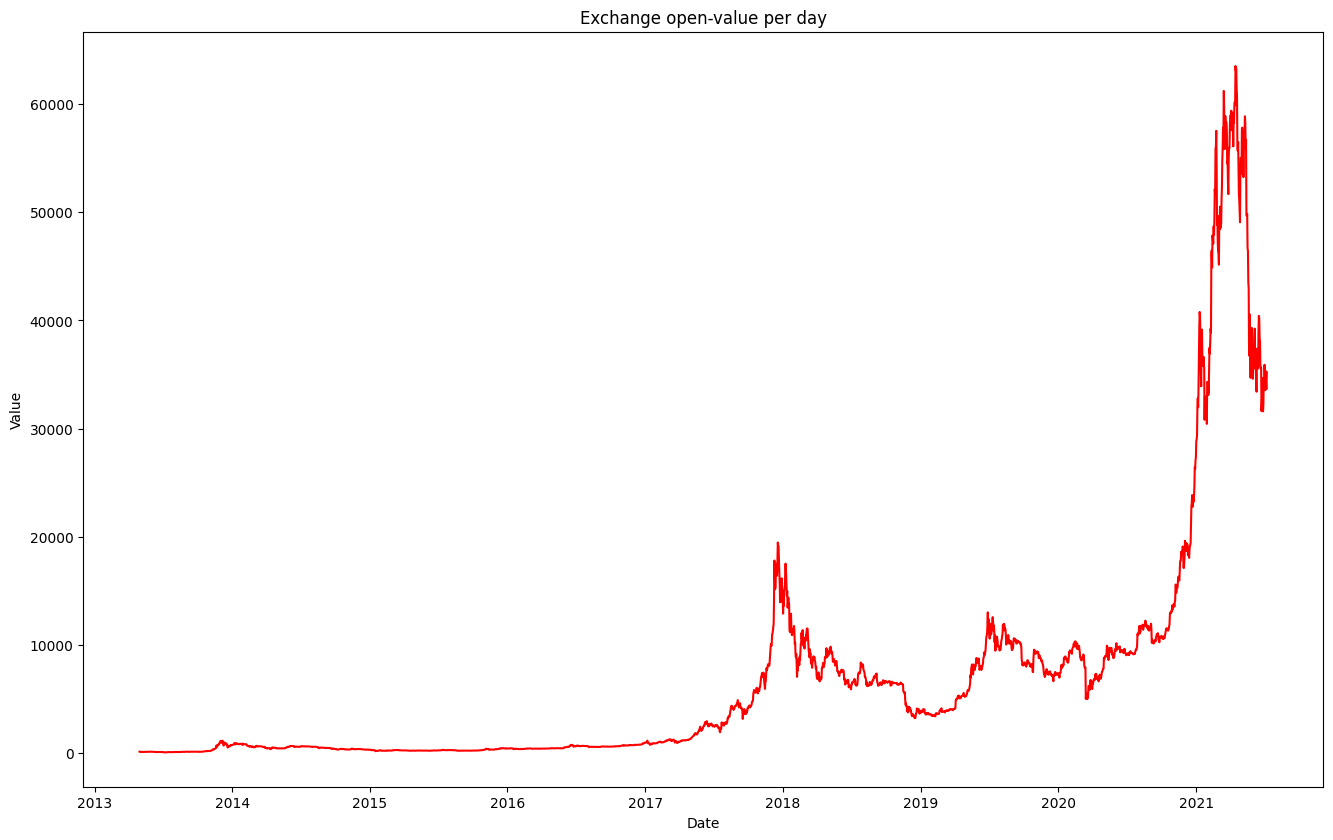

In [12]:
plot_dataset(dataset, dataset.index, dataset.Open, "Exchange open-value per day", 'r')

### Plot for High

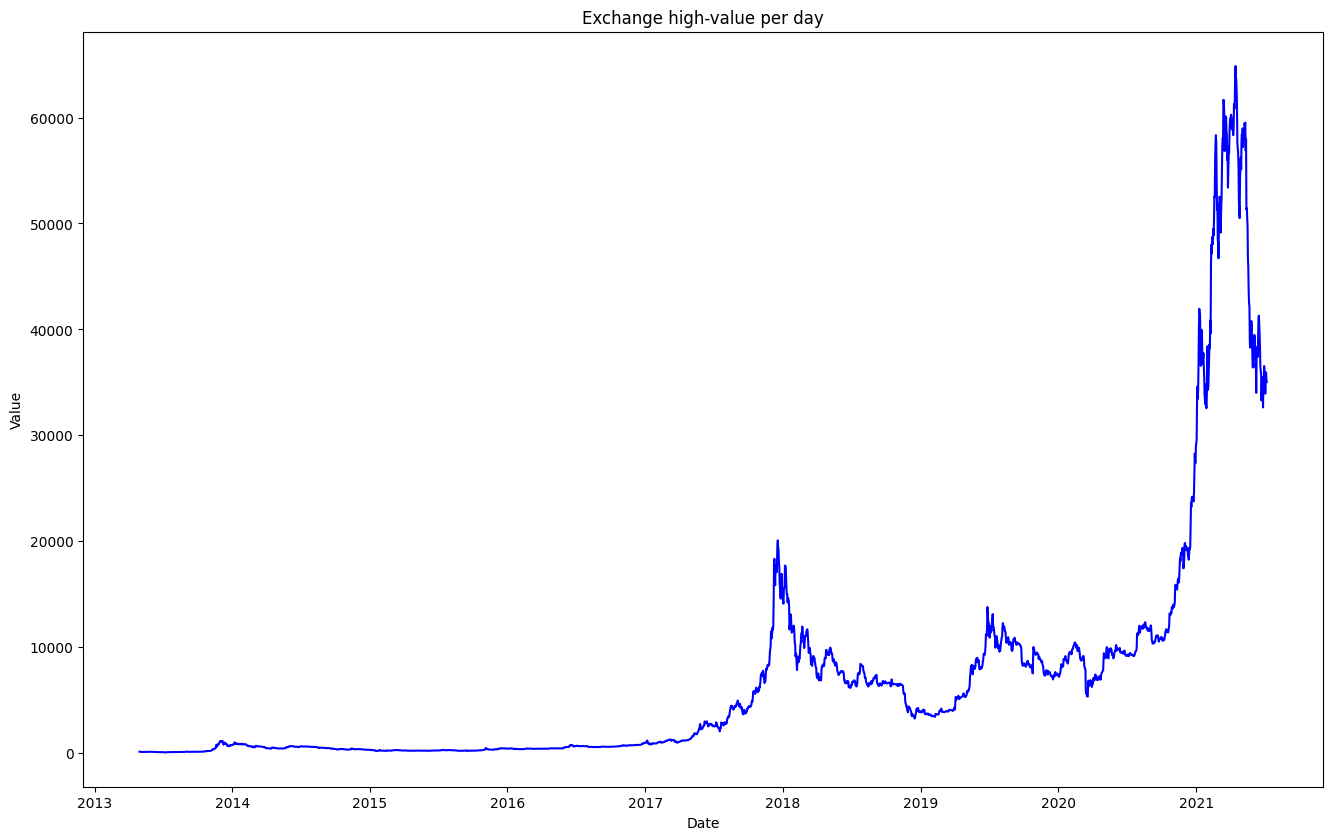

In [38]:
plot_dataset(dataset, dataset.index, dataset.High, "Exchange high-value per day", 'blue')

### Plot for Low

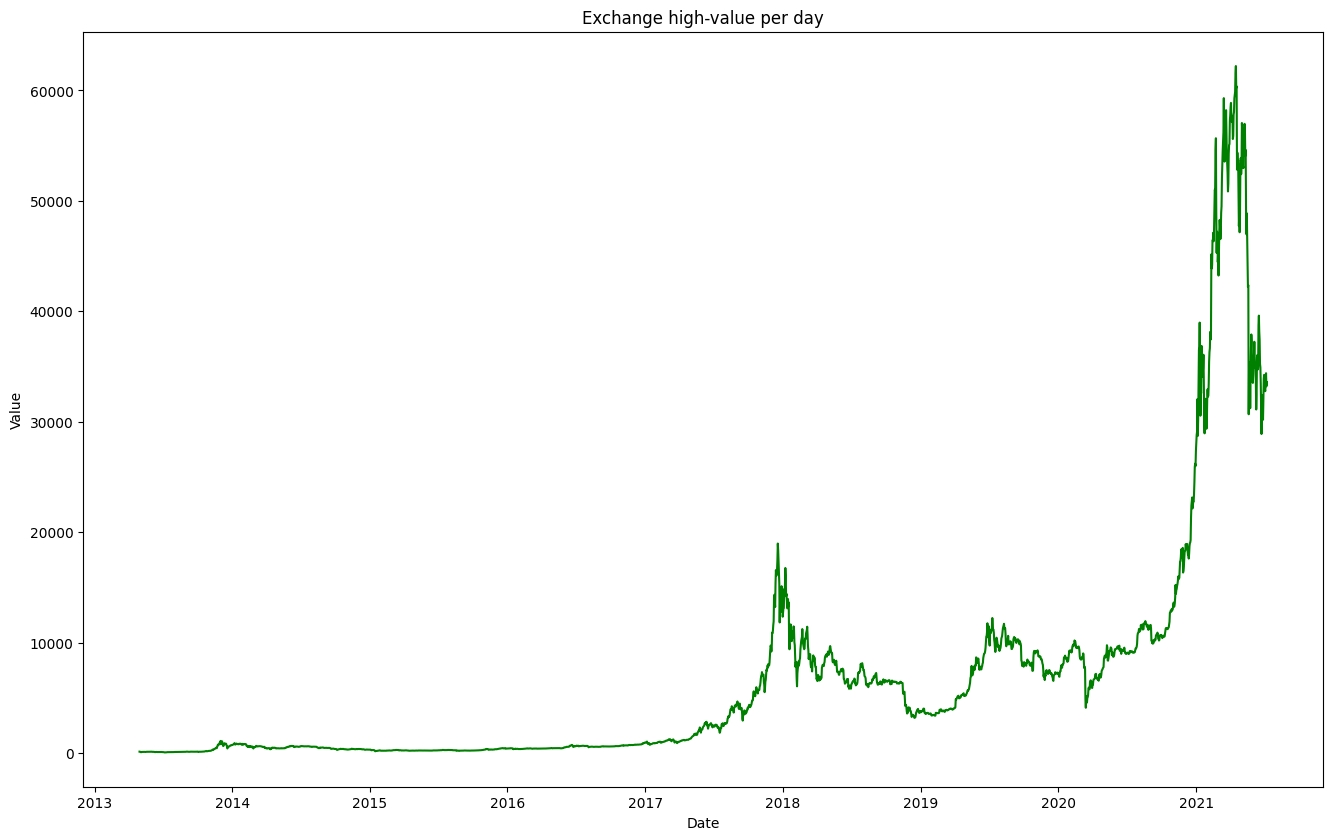

In [39]:
plot_dataset(dataset, dataset.index, dataset.Low, "Exchange high-value per day", 'green')

### Plot for Close

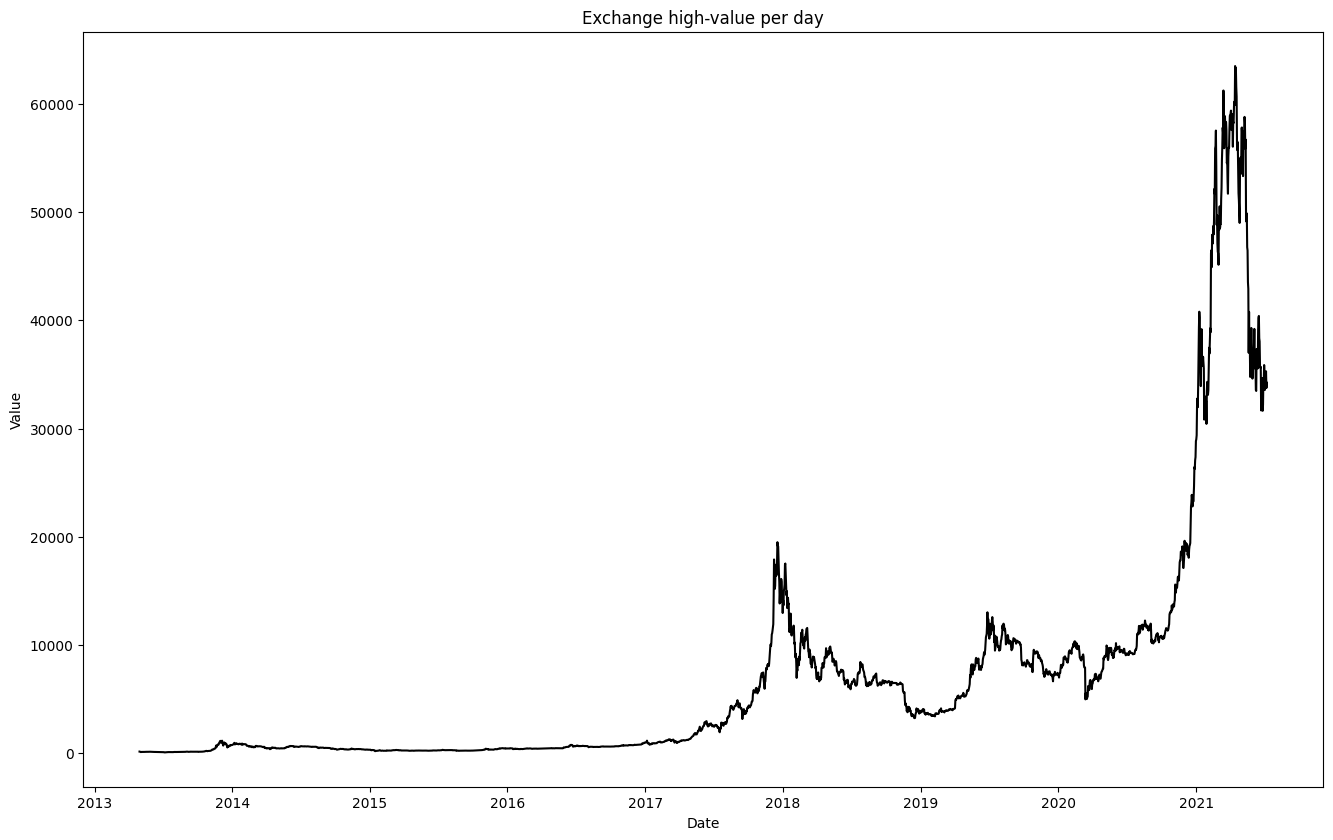

In [40]:
plot_dataset(dataset, dataset.index, dataset.Close, "Exchange high-value per day", 'black')

### Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution
 You can group the data at seasonal intervals and see how the values are distributed within a given year or month and how it compares over time.The boxplots make the year-wise and month-wise distributions evident

In [110]:
dataset = pd.read_csv('modified_dataset.csv', header = 0)
dataset.reset_index(inplace = True)
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Years'] = [d.year for d in dataset.Date]
dataset['Monthes'] = [d.month for d in dataset.Date]
years = dataset['Years'].unique()

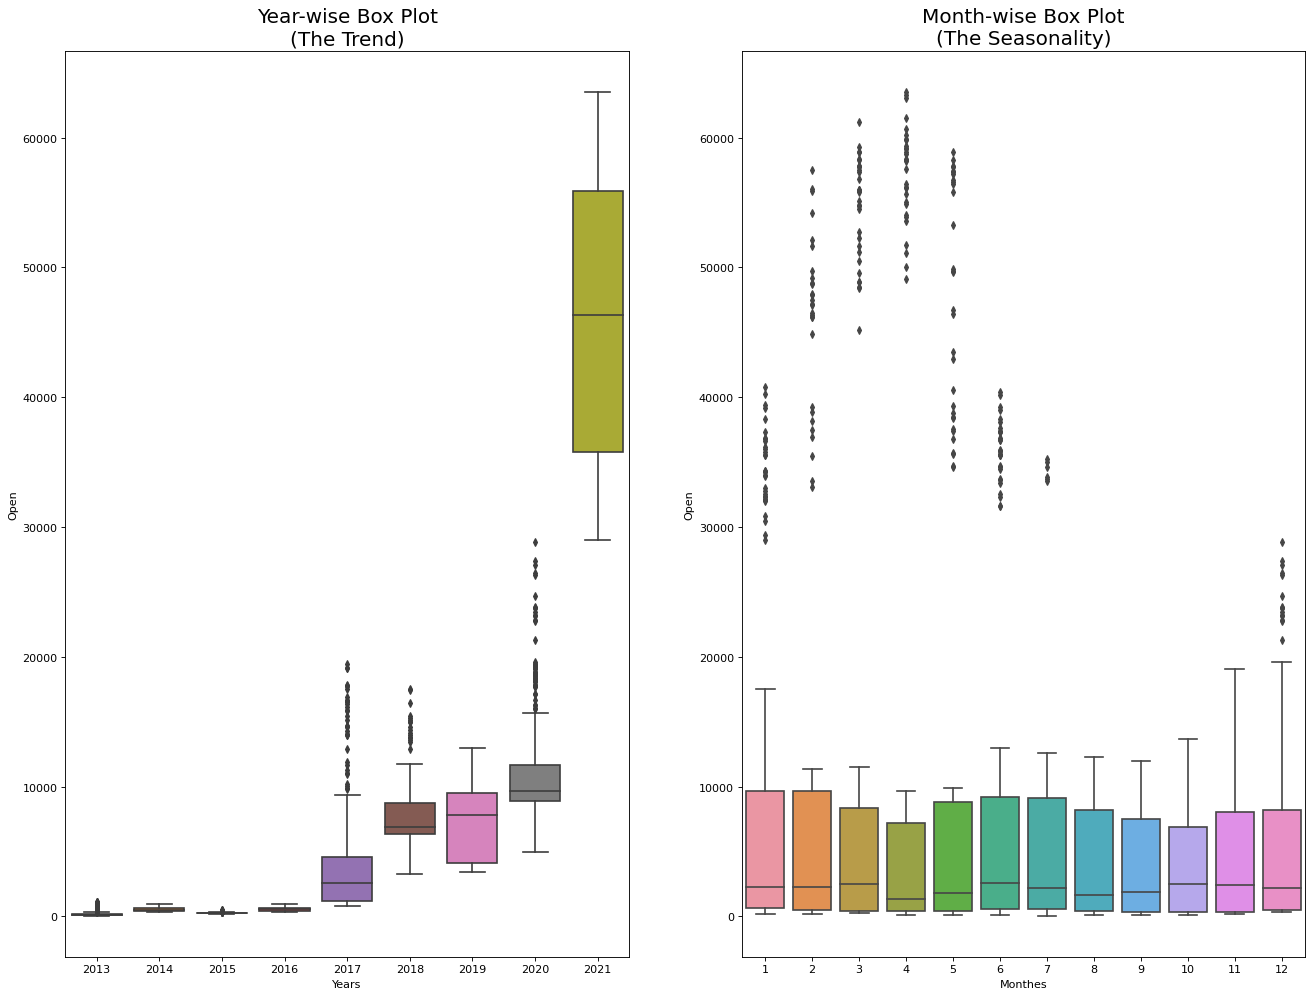

In [117]:
fig, axes = plt.subplots(1, 2, figsize=(20,15), dpi= 80)
sns.boxplot(x = dataset['Years'], y = dataset['Open'], data = dataset, ax = axes[0])
sns.boxplot(x = dataset['Monthes'], y = dataset['Open'], data = dataset.loc[~dataset.Years.isin([2017, 2021]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

### Additive and multiplicative time series

Depending on the nature of the trend and seasonality, a time series can be modeled as an additive or multiplicative, wherein, each observation in the series can be expressed as either a sum or a product of the components:

*Additive time series:*

Value = Base Level + Trend + Seasonality + Error

*Multiplicative Time Series:*

Value = Base Level x Trend x Seasonality x Error

### Decomposing our time series into its components
You can do a classical decomposition of a time series by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual.

In [124]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [125]:
dataset = pd.read_csv('modified_dataset.csv', parse_dates=['Date'], index_col='Date')

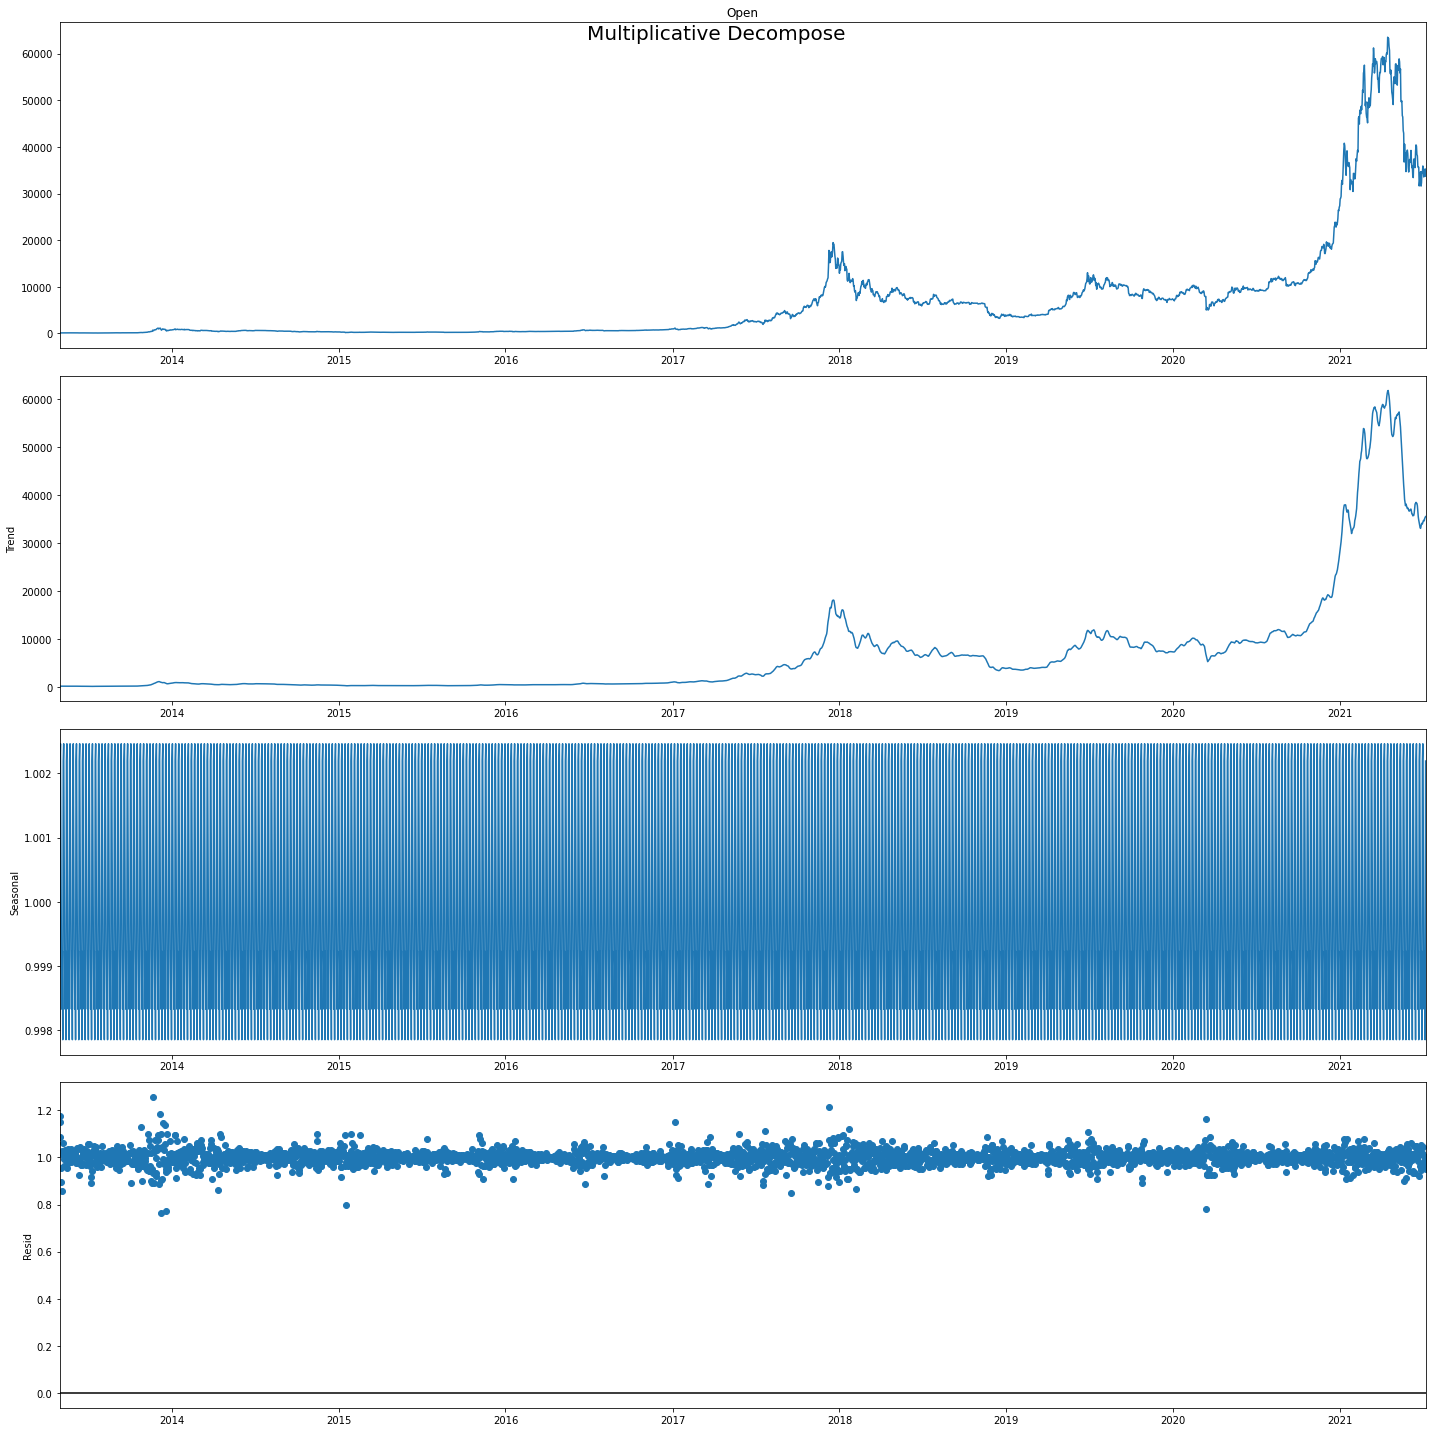

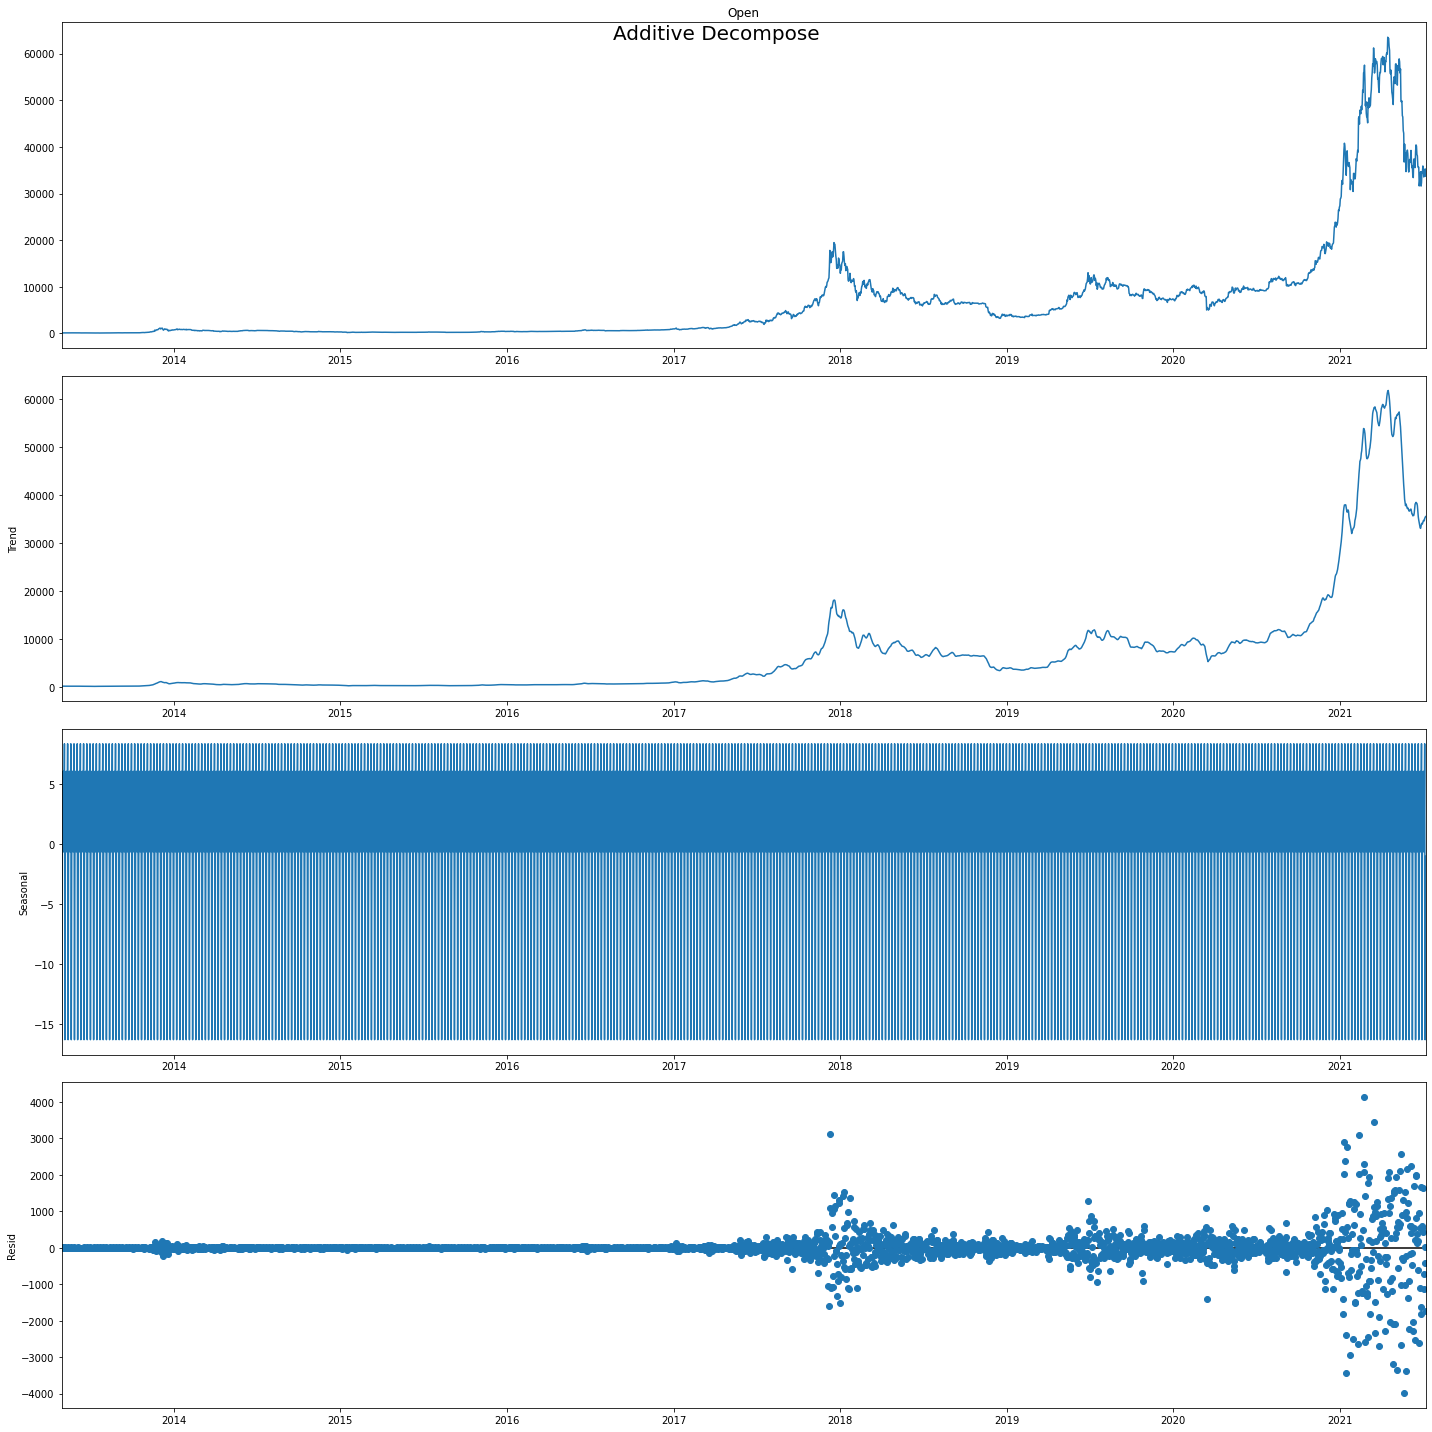

In [130]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(dataset['Open'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(dataset['Open'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (20,20)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=20)
result_add.plot().suptitle('Additive Decompose', fontsize=20)
plt.show()

The numerical output of the trend, seasonal and residual components are stored in the result_mul output itself. Let’s extract them and put it in a dataframe.

In [133]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
dataset_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
dataset_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
dataset_reconstructed.head(-5)

,seas,trend,resid,actual_values
Date,,,,
2013-04-29 23:59:59,0.997854,123.890969,1.087514,134.444000
2013-04-30 23:59:59,1.002193,122.268127,1.175163,144.000000
2013-05-01 23:59:59,1.002461,120.645285,1.149310,139.000000
2013-05-02 23:59:59,1.000749,121.582000,0.956497,116.379997
2013-05-03 23:59:59,0.999177,118.944286,0.894011,106.250000
...,...,...,...,...
2021-06-27 23:59:59,0.999235,33898.165951,0.953215,32287.523211
2021-06-28 23:59:59,0.997854,34091.477710,1.019425,34679.122222
2021-06-29 23:59:59,1.002193,33932.977092,1.013767,34475.559697
